<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [38]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly
!pip install lxml
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 135.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 113.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 135.0 MB/s eta 0:00:00


In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [6]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [27]:
import yfinance as yf

tesla = yf.Ticker("TSLA")

tesla_data = tesla.history(start="2020-01-01", end="2023-12-31")

print(tesla_data.head())


                                Open       High        Low      Close  \
Date                                                                    
2020-01-02 00:00:00-05:00  28.299999  28.713333  28.114000  28.684000   
2020-01-03 00:00:00-05:00  29.366667  30.266666  29.128000  29.534000   
2020-01-06 00:00:00-05:00  29.364668  30.104000  29.333332  30.102667   
2020-01-07 00:00:00-05:00  30.760000  31.441999  30.224001  31.270666   
2020-01-08 00:00:00-05:00  31.580000  33.232666  31.215334  32.809334   

                              Volume  Dividends  Stock Splits  
Date                                                           
2020-01-02 00:00:00-05:00  142981500        0.0           0.0  
2020-01-03 00:00:00-05:00  266677500        0.0           0.0  
2020-01-06 00:00:00-05:00  151995000        0.0           0.0  
2020-01-07 00:00:00-05:00  268231500        0.0           0.0  
2020-01-08 00:00:00-05:00  467164500        0.0           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [30]:
import pandas as pd
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Descargar el contenido HTML
response = requests.get(url)
html_content = response.text

# Leer la tabla desde el HTML
tesla_revenue = pd.read_html(html_content)[0]

# Renombrar columnas
tesla_revenue.columns = ['Date', 'Revenue']

# Limpiar y guardar
tesla_revenue.to_csv("tesla_revenue.csv", index=False)

# Mostrar las cinco últimas filas
print("Las cinco últimas filas del dataframe tesla_revenue:")
print(tesla_revenue.tail())

Las cinco últimas filas del dataframe tesla_revenue:
    Date Revenue
8   2013  $2,013
9   2012    $413
10  2011    $204
11  2010    $117
12  2009    $112


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [ ]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)

Execute the following lines to remove an null or empty strings in the Revenue column.


In [ ]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [31]:
import yfinance as yf
import pandas as pd

# Pregunta 3: Extraer datos bursátiles de GameStop
gme_symbol = "GME"

# Descargar datos históricos
gme_data = yf.download(gme_symbol, start="2020-01-01", end="2023-12-31")

# Restablecer el índice
gme_data.reset_index(inplace=True)

# Guardar en CSV
gme_data.to_csv("gme_stock_data.csv", index=False)

# Mostrar las cinco primeras filas del dataframe gme_data
print("Primeras cinco filas del dataframe gme_data:")
print(gme_data.head())

[*********************100%***********************]  1 of 1 completed

Primeras cinco filas del dataframe gme_data:
Price        Date   Close    High     Low    Open    Volume
Ticker                GME     GME     GME     GME       GME
0      2020-01-02  1.5775  1.6175  1.5175  1.5350  17814400
1      2020-01-03  1.4700  1.5625  1.4600  1.5525  14175600
2      2020-01-06  1.4625  1.4775  1.4000  1.4500  13579200
3      2020-01-07  1.3800  1.4575  1.3600  1.4425  20912000
4      2020-01-08  1.4300  1.4625  1.3525  1.3725  22517600


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [36]:
import pandas as pd
import requests

url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Descargar HTML y extraer tabla
html_content = requests.get(url_gme).text
gme_revenue = pd.read_html(html_content)[0]

# Configurar columnas y limpiar datos
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('$', '').str.replace(',', '')

# Mostrar últimas cinco filas
print("Últimas 5 filas de gme_revenue:")
print(gme_revenue.tail())

# Guardar
gme_revenue.to_csv("gme_revenue.csv", index=False)

Últimas 5 filas de gme_revenue:
    Date Revenue
11  2009    8806
12  2008    7094
13  2007    5319
14  2006    3092
15  2005    1843


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


=== VERIFICACIÓN DE DATOS ===
Stock data columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
Stock data shape: (1006, 8)

Revenue data columns: ['Date', 'Revenue']
Revenue data shape: (13, 2)


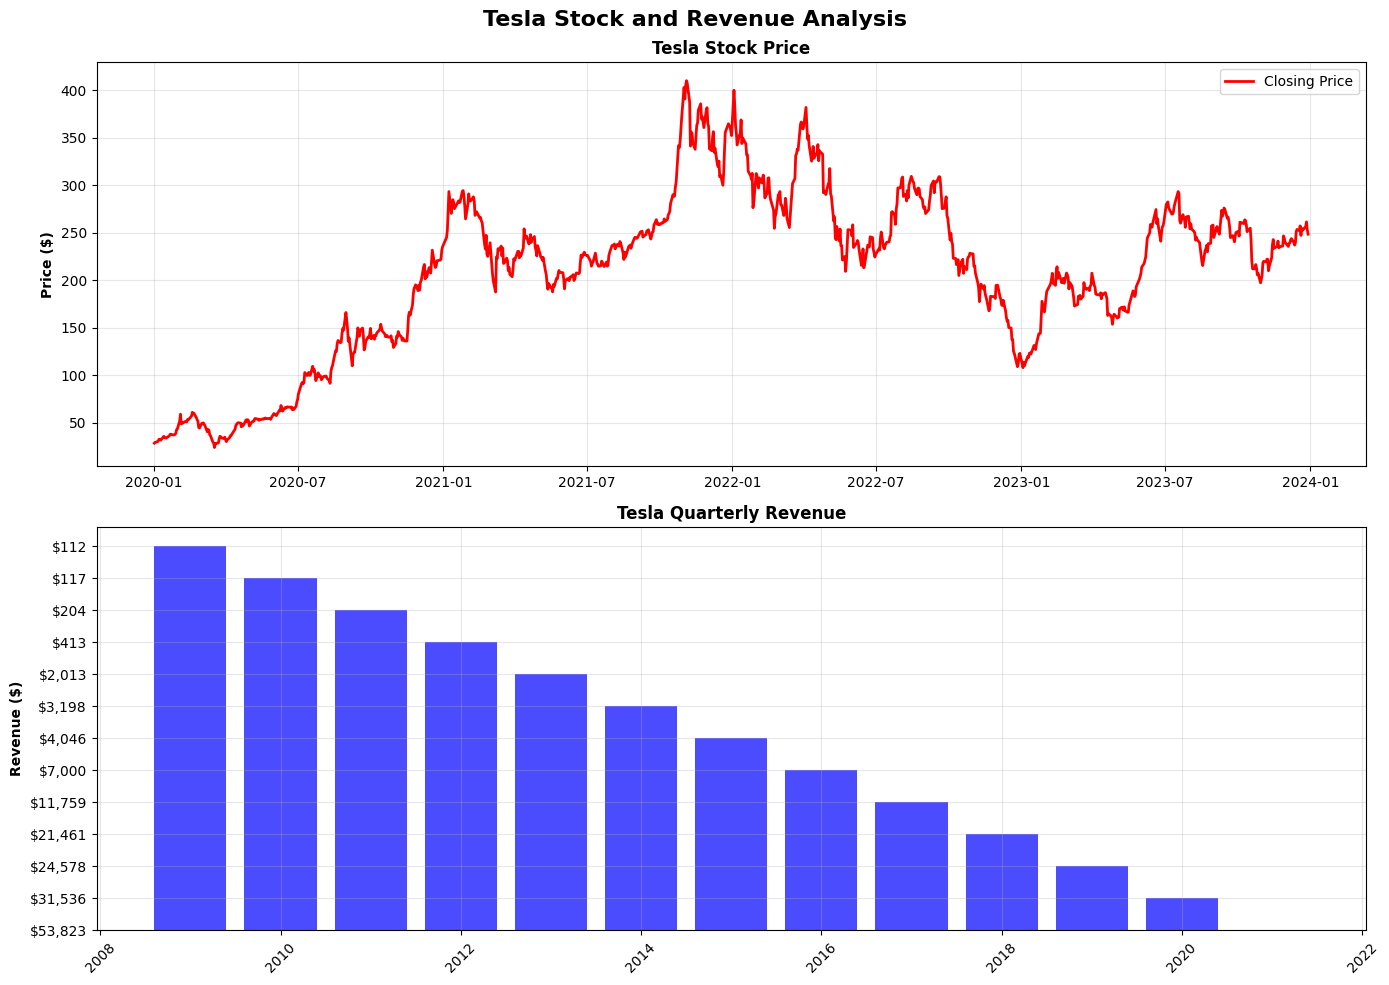

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

def make_graph(stock_data, revenue_data, title):
    # Crear copias para no modificar los originales
    stock_df = stock_data.reset_index() if hasattr(stock_data.index, 'name') and stock_data.index.name == 'Date' else stock_data.copy()
    revenue_df = revenue_data.copy()
    
    # Renombrar columnas si es necesario
    if 'Date' not in stock_df.columns and 'date' in stock_df.columns:
        stock_df.rename(columns={'date': 'Date'}, inplace=True)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    # Gráfico de acciones
    if 'Close' in stock_df.columns:
        x_data = stock_df['Date'] if 'Date' in stock_df.columns else stock_df.index
        ax1.plot(x_data, stock_df['Close'], color='red', linewidth=2, label='Closing Price')
        ax1.set_title('Tesla Stock Price', fontweight='bold')
        ax1.set_ylabel('Price ($)', fontweight='bold')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
    else:
        print("Columna 'Close' no encontrada en stock_data")
    
    # Gráfico de ingresos
    if 'Revenue' in revenue_df.columns:
        x_rev = revenue_df['Date'] if 'Date' in revenue_df.columns else revenue_df.index
        ax2.bar(x_rev, revenue_df['Revenue'], color='blue', alpha=0.7)
        ax2.set_title('Tesla Quarterly Revenue', fontweight='bold')
        ax2.set_ylabel('Revenue ($)', fontweight='bold')
        ax2.tick_params(axis='x', rotation=45)
        ax2.grid(True, alpha=0.3)
    else:
        print("Columna 'Revenue' no encontrada en revenue_data")
    
    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('tesla_stock_graph.png', dpi=300, bbox_inches='tight')
    plt.show()

# Verificar datos primero
print("=== VERIFICACIÓN DE DATOS ===")
print("Stock data columns:", tesla_data.columns.tolist())
print("Stock data shape:", tesla_data.shape)
print("\nRevenue data columns:", tesla_revenue.columns.tolist())
print("Revenue data shape:", tesla_revenue.shape)

# Ejecutar la función
make_graph(tesla_data, tesla_revenue, "Tesla Stock and Revenue Analysis")

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


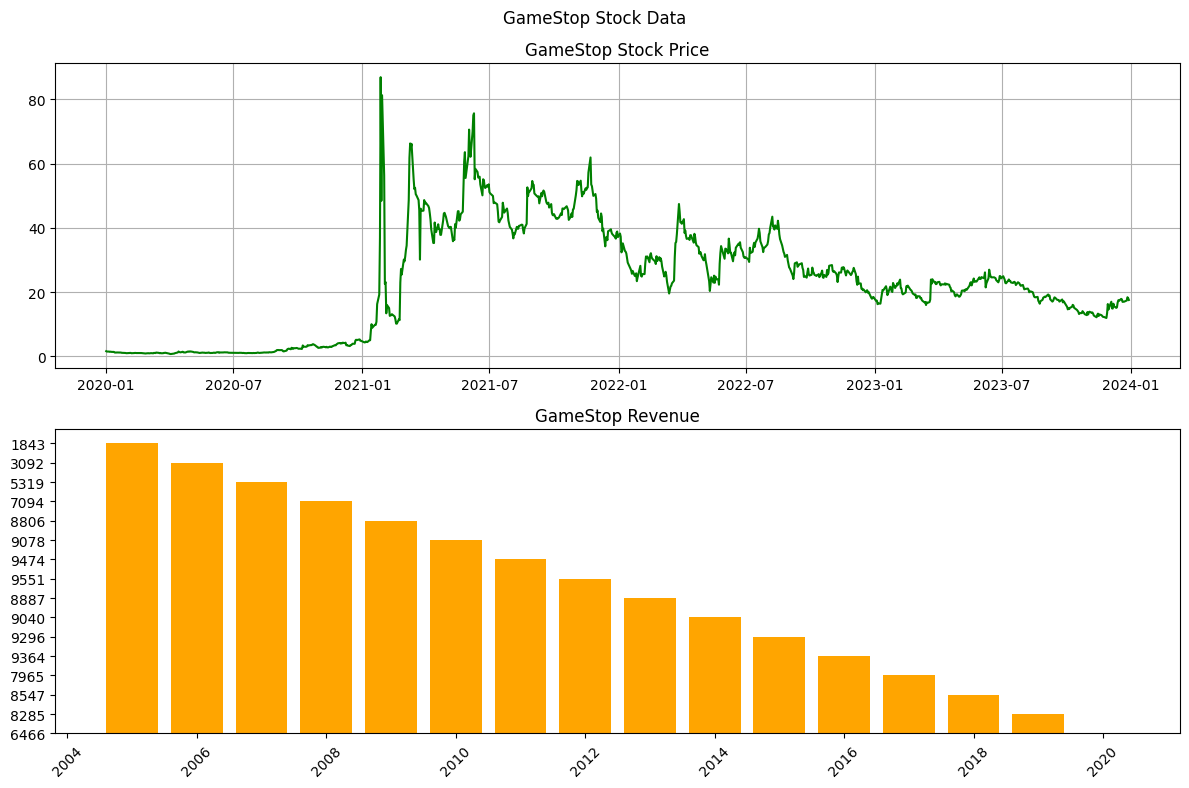

<Figure size 640x480 with 0 Axes>

In [43]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    # Reset index if Date is not a column
    if 'Date' not in stock_data.columns:
        stock_data = stock_data.reset_index()
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # Stock price
    ax1.plot(stock_data['Date'], stock_data['Close'], color='green')
    ax1.set_title('GameStop Stock Price')
    ax1.grid(True)
    
    # Revenue
    ax2.bar(revenue_data['Date'], revenue_data['Revenue'], color='orange')
    ax2.set_title('GameStop Revenue')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Usar la función
make_graph(gme_data, gme_revenue, "GameStop Stock Data")
plt.savefig('gamestop_graph.png')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
